<a href="https://colab.research.google.com/github/tavares51/VisualizacaoDeDados/blob/main/Exercicio3_171689.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
 <img src="https://mlogu6g7z5ex.i.optimole.com/cb:RF8R~518a6/w:auto/h:auto/q:90/https://facens.br/wp-content/uploads/2021/03/logo-f.png" width="150px">
 <h1> Dataviz - Especialização em Ciência de Dados - FACENS<br><br>
    Exercício 3
 </h1>
</div>
<br><br>

Utilizar dataset BlackFriday

* **Aluno: Victor Tavares**
* **RA: 171689**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('BlackFriday.csv')

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Questão 1

Construa um ou mais gráficos do tipo violino que permita(m) a comparação entre o valor gasto e a idade dos compradores.

<Axes: xlabel='Age', ylabel='Purchase'>

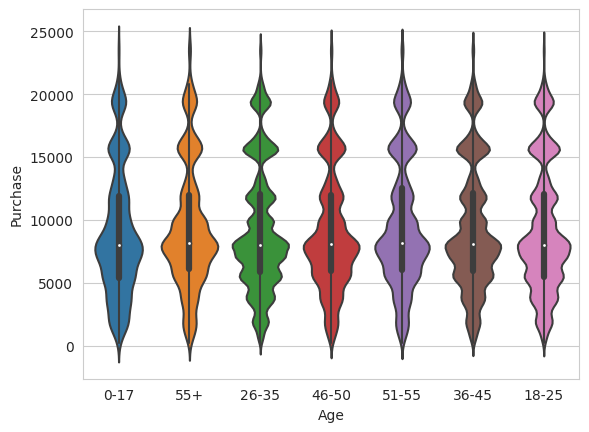

In [7]:
sns.set_style('whitegrid')

sns.violinplot(x='Age', y='Purchase', data=df)

## Questão 2

Represente graficamente os Top N produtos mais comprados, onde N <= 15

In [47]:
top = df.Product_ID.value_counts(sort=True).head(15)
top.shape

(15,)

In [48]:
top

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
Name: Product_ID, dtype: int64

<Axes: >

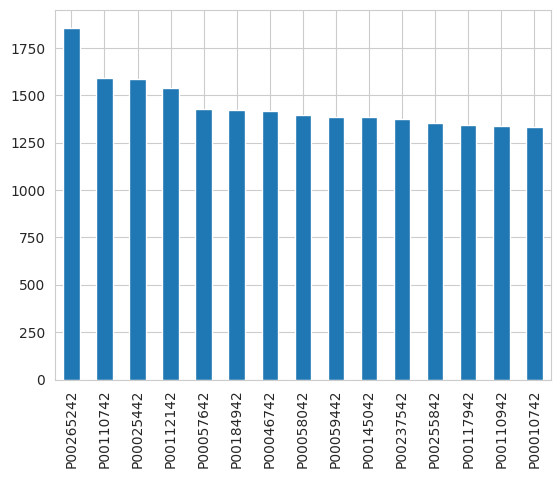

In [49]:
top.plot.bar()

## Questão 3

Represente graficamente a distribuição dos valores gastos em cada faixa etária dos compradores associados às 5 ocupações mais frequentes.

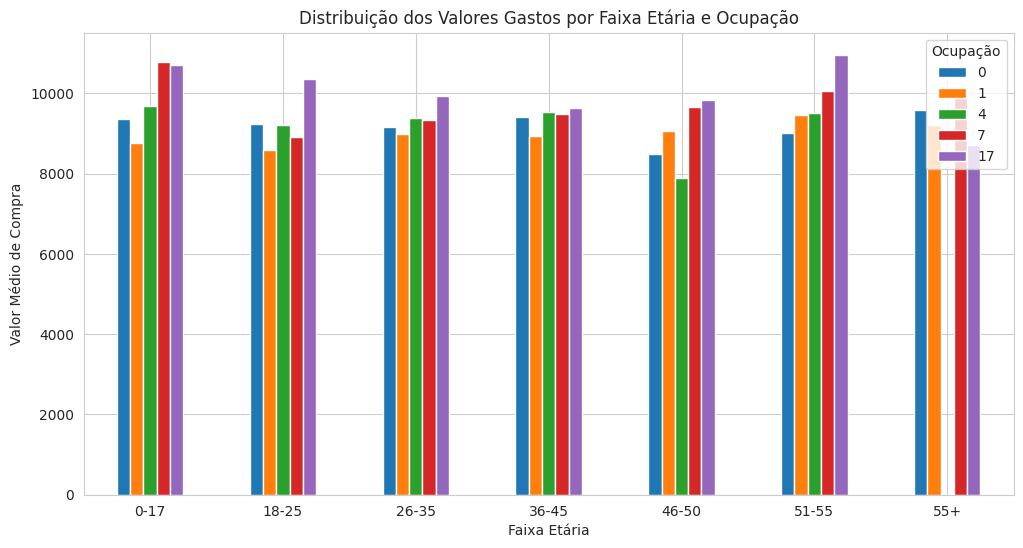

In [50]:
top_occupations = df['Occupation'].value_counts().head(5).index
filtered_data = df[df['Occupation'].isin(top_occupations)]

grouped_data = filtered_data.groupby(['Age', 'Occupation'])['Purchase'].mean().unstack()

grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('Distribuição dos Valores Gastos por Faixa Etária e Ocupação')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor Médio de Compra')
plt.xticks(rotation=0)
plt.legend(title='Ocupação')
plt.show()

## Questão 4

Represente visualmente a relação entre ocupação e estado civil das compras com valor maior que nove mil.

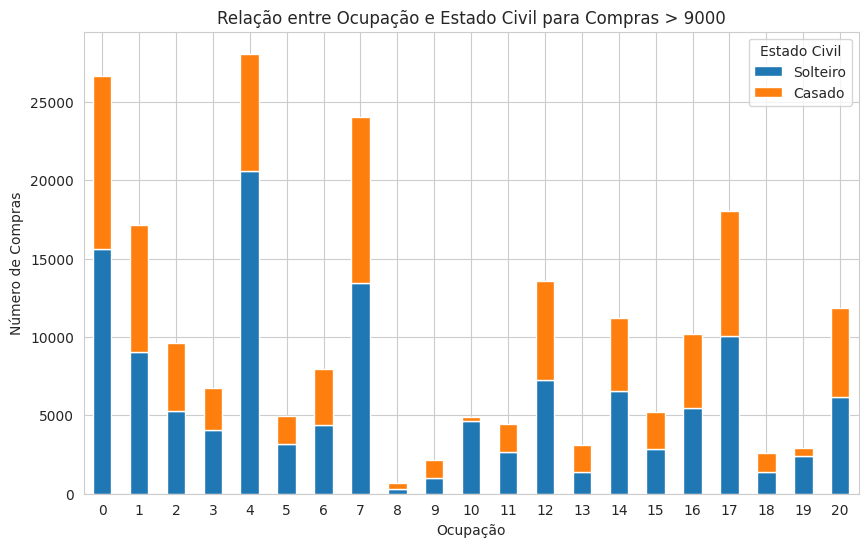

In [51]:
filtered_data = df[df['Purchase'] > 9000]

contingency_table = pd.crosstab(filtered_data['Occupation'], filtered_data['Marital_Status'])

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relação entre Ocupação e Estado Civil para Compras > 9000')
plt.xlabel('Ocupação')
plt.ylabel('Número de Compras')
plt.xticks(rotation=0)
plt.legend(title='Estado Civil', labels=['Solteiro', 'Casado'])
plt.show()